In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

import gradio as gr

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
labels = ['red', 'black', 'geographic', 'normal', 'yellow']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
train = get_data('C:/Users/NEHA UTTWANI/Downloads/data/train')
val = get_data('C:/Users/NEHA UTTWANI/Downloads/data/test')

<ipython-input-2-57acbdee1db2>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


In [4]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [5]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)        

In [6]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(5, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0

In [7]:
opt = Adam(learning_rate=0.0005)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [8]:
history = model.fit(x_train,y_train,epochs = 25 , validation_data = (x_val, y_val))

Epoch 1/25


C:\Users\NEHA UTTWANI\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


3/3 [==============================] - 29s 2s/step - loss: 1.8113 - accuracy: 0.1983 - val_loss: 1.6695 - val_accuracy: 0.2903
Epoch 2/25
3/3 [==============================] - 5s 1s/step - loss: 1.5943 - accuracy: 0.2434 - val_loss: 1.5796 - val_accuracy: 0.1935
Epoch 3/25
3/3 [==============================] - 6s 2s/step - loss: 1.5524 - accuracy: 0.2831 - val_loss: 1.5549 - val_accuracy: 0.2581
Epoch 4/25
3/3 [==============================] - 5s 2s/step - loss: 1.4722 - accuracy: 0.4221 - val_loss: 1.5475 - val_accuracy: 0.3226
Epoch 5/25
3/3 [==============================] - 5s 2s/step - loss: 1.4477 - accuracy: 0.4338 - val_loss: 1.4624 - val_accuracy: 0.4516
Epoch 6/25
3/3 [==============================] - 5s 1s/step - loss: 1.2988 - accuracy: 0.5587 - val_loss: 1.3624 - val_accuracy: 0.6129
Epoch 7/25
3/3 [==============================] - 5s 2s/step - loss: 1.1859 - accuracy: 0.7443 - val_loss: 1.2634 - val_accuracy: 0.6129
Epoch 8/25
3/3 [==============================] - 5

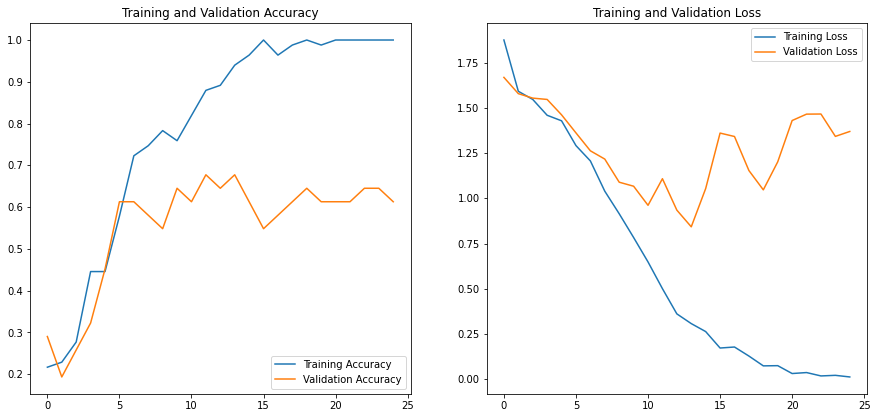

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['red (Class 0)','black (Class 1)', 'geographic (Class 2)', 'normal (Class 3)', 'yellow (Class 4)']))

C:\Users\NEHA UTTWANI\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


                      precision    recall  f1-score   support

       red (Class 0)       0.60      0.86      0.71         7
     black (Class 1)       0.75      0.67      0.71         9
geographic (Class 2)       0.00      0.00      0.00         5
    normal (Class 3)       0.50      0.40      0.44         5
    yellow (Class 4)       0.62      1.00      0.77         5

            accuracy                           0.61        31
           macro avg       0.49      0.58      0.53        31
        weighted avg       0.53      0.61      0.56        31



In [11]:
print(confusion_matrix(y_val, predictions))

[[6 1 0 0 0]
 [0 6 0 0 3]
 [3 0 0 2 0]
 [1 1 1 2 0]
 [0 0 0 0 5]]


In [12]:
# import pickle
# with open('drtongue_model.pkl', 'wb') as file:
#   pickle.dump(model, file)

In [13]:
def predict_image(img):
  img_4d=img.reshape(-1,224,224,3)
  prediction=model.predict(img_4d)[0]
  return {labels[i]: float(prediction[i]) for i in range(5)}

image = gr.inputs.Image(shape=(224,224))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True', share=True)

Running locally at: http://127.0.0.1:7861/
To create a public link, set `share=True` in `launch()`.
Interface loading below...
